In [2]:
import matplotlib.pyplot as plt
import pickle
import numpy as np
import scipy.stats as stats
from collections import defaultdict

In [3]:
with open('mappings/Q2/playlist_dataAUTHORCOUNT.pkl', 'rb') as fp:
    playlist_data = pickle.load(fp)

In [4]:
h = defaultdict(int)
for k,v in playlist_data.items():
    for song in v[0]:
        for authID in song:
            h[authID] += 1

In [5]:
auths = np.array([v for k,v in h.items()])

In [6]:
len(auths)

407276

In [7]:
print(np.max(auths), np.min(auths))

1221895 1


In [8]:
auths = np.sort(auths)[::-1]

In [9]:
len(auths)

407276

In [10]:
x_axis = list(range(0, len(auths)))

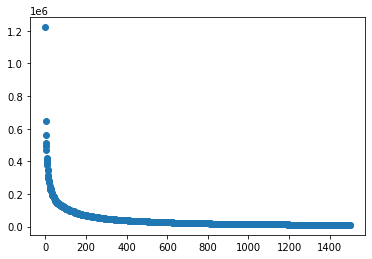

In [11]:
plt.scatter(x_axis[:1500], auths[:1500])

In [46]:
a = np.sort(auths)
total = np.sum(a)
population = len(a)
step = 0.01
data = [[0,0]]
pct = step
while pct < 1+step:
    ix = int(np.ceil(population*pct))
    wealth = np.sum(a[:ix])/total
    data.append([pct, wealth])
    pct+=step

print(len(data))
data = np.array(data)

101


In [61]:
# Source: https://github.com/oliviaguest/gini
# This is the formulation given in 
# https://en.wikipedia.org/wiki/Gini_coefficient#:~:text=at%20least%2049%25.-,Alternative%20expressions,-%5Bedit%5D
def gini(array):
    """Calculate the Gini coefficient of a numpy array."""
    index = np.arange(1,array.shape[0]+1) #index per array element
    n = len(a)
    return ((np.sum((2 * index - n  - 1) * array)) / (n * np.sum(array))) #Gini coefficient

gini_coeff = gini(a*1.0)

Text(0, 0.5, '% of Appearances')

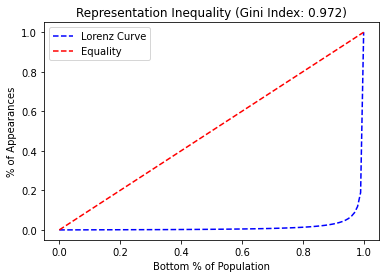

In [66]:
plt.plot(data[:,0],data[:,1], 'b--', label='Lorenz Curve')
plt.plot(np.linspace(0,1), np.linspace(0,1), 'r--', label = 'Equality')
plt.title('Representation Inequality (Gini Index: {})'.format(np.around(gini_coeff, 3)))
plt.legend()
plt.xlabel('Bottom % of Population')
plt.ylabel('% of Appearances')

0.9720931163004327

Text(0, 0.5, 'Appearances')

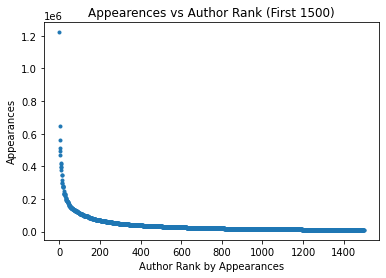

In [73]:
k = 1500
plt.plot(x_axis[:k], auths[:k], '.')
plt.title('Appearences vs Author Rank (First {})'.format(k))
plt.xlabel('Author Rank by Appearances')
plt.ylabel('Appearances')

In [50]:
# Test for power law

In [51]:
K = np.max(auths)

In [52]:
new_h = defaultdict(int)
for k,v in h.items():
    new_h[k] = v/np.sqrt(K) # here we play with scaling a bit to not penalize tail that heavily

In [53]:
list(new_h.items())[:5]

[('7g6SFEhjnq2V2kpY8juNuD', 0.06423051510094611),
 ('2zhxw6A7BNmwZpgCJkjwRz', 0.16917051160390034),
 ('4WU7o63S7gxuTIw6WaRYR2', 0.003618620569067387),
 ('2FOROU2Fdxew72QmueWSUy', 0.012665171991735854),
 ('2g7CkpYVzBvSbHkWUDp5sK', 0.15198206390083024)]

In [54]:
pops = np.array([v for k,v in new_h.items()])
print(np.min(pops), np.max(pops), np.mean(pops))

0.0009046551422668467 1105.3935950601488 0.19905282519456013


In [56]:
with open('mappings/Q2/auth_to_derived_popularity.pkl', 'wb') as fp:
    pickle.dump(new_h, fp)